In [64]:
import geopandas
from geodatasets import get_path

path_to_data = get_path("nybb")
data = geopandas.read_file(path_to_data)

gdf = geopandas.GeoDataFrame(data)
gdf

<class 'geopandas.geodataframe.GeoDataFrame'>


In [25]:
gdf.to_file("my_file.geojson", driver="GeoJSON")

gdf.to_csv("geodatasets.csv")

In [33]:
gdf.columns

Index(['BoroCode', 'Shape_Leng', 'Shape_Area', 'geometry', 'area', 'boundary'], dtype='object')

In [39]:
gdf["Shape_Leng"]

BoroName
Staten Island    330470.010332
Queens           896344.047763
Brooklyn         741080.523166
Manhattan        359299.096471
Bronx            464392.991824
Name: Shape_Leng, dtype: float64

<Axes: >

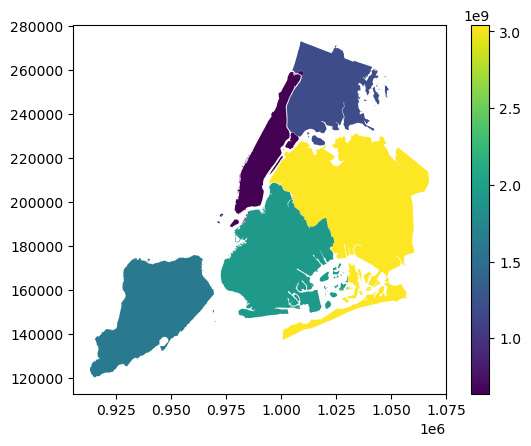

In [40]:
gdf.plot("area", legend=True)

In [54]:
area = gdf["area"]
area

BoroName
Staten Island    1.623822e+09
Queens           3.045214e+09
Brooklyn         1.937478e+09
Manhattan        6.364712e+08
Bronx            1.186926e+09
Name: area, dtype: float64

In [87]:
import leafmap as lm

Map = lm.Map()
Map.add_basemap(basemap="HYBRID")
Map.add_gdf(gdf, layer_name="NYC", fill_colors="red")
# Map.center(gdf)
Map
# gdf.plot("area", legend=True)



Map(center=[20, 0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_text…

In [67]:
gdf = gdf.set_geometry("centroid")
gdf.plot("area", legend=True)

ValueError: Unknown column centroid

In [69]:
import pandas as pd
import geopandas
import matplotlib.pyplot as plt
from geodatasets import get_path

In [71]:
df = pd.DataFrame(
    {
        "City": ["Buenos Aires", "Brasilia", "Santiago", "Bogota", "Caracas"],
        "Country": ["Argentina", "Brazil", "Chile", "Colombia", "Venezuela"],
        "Latitude": [-34.58, -15.78, -33.45, 4.60, 10.48],
        "Longitude": [-58.66, -47.91, -70.66, -74.08, -66.86],
    }
)
df

,City,Country,Latitude,Longitude
0,Buenos Aires,Argentina,-34.58,-58.66
1,Brasilia,Brazil,-15.78,-47.91
2,Santiago,Chile,-33.45,-70.66
3,Bogota,Colombia,4.60,-74.08
4,Caracas,Venezuela,10.48,-66.86


In [74]:
gdf = geopandas.GeoDataFrame(
    df, geometry=geopandas.points_from_xy(df.Longitude, df.Latitude), crs="EPSG:4326"
)
gdf

,City,Country,Latitude,Longitude,geometry
0,Buenos Aires,Argentina,-34.58,-58.66,POINT (-58.66 -34.58)
1,Brasilia,Brazil,-15.78,-47.91,POINT (-47.91 -15.78)
2,Santiago,Chile,-33.45,-70.66,POINT (-70.66 -33.45)
3,Bogota,Colombia,4.60,-74.08,POINT (-74.08 4.6)
4,Caracas,Venezuela,10.48,-66.86,POINT (-66.86 10.48)


In [75]:
gdf.head()

,City,Country,Latitude,Longitude,geometry
0,Buenos Aires,Argentina,-34.58,-58.66,POINT (-58.66 -34.58)
1,Brasilia,Brazil,-15.78,-47.91,POINT (-47.91 -15.78)
2,Santiago,Chile,-33.45,-70.66,POINT (-70.66 -33.45)
3,Bogota,Colombia,4.60,-74.08,POINT (-74.08 4.6)
4,Caracas,Venezuela,10.48,-66.86,POINT (-66.86 10.48)


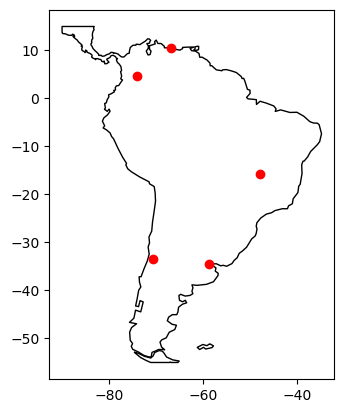

In [76]:
world = geopandas.read_file(get_path("naturalearth.land"))

# We restrict to South America.
ax = world.clip([-90, -55, -25, 15]).plot(color="white", edgecolor="black")

# We can now plot our ``GeoDataFrame``.
gdf.plot(ax=ax, color="red")

plt.show()

In [78]:
df = pd.DataFrame(
    {
        "City": ["Buenos Aires", "Brasilia", "Santiago", "Bogota", "Caracas"],
        "Country": ["Argentina", "Brazil", "Chile", "Colombia", "Venezuela"],
        "Coordinates": [
            "POINT(-58.66 -34.58)",
            "POINT(-47.91 -15.78)",
            "POINT(-70.66 -33.45)",
            "POINT(-74.08 4.60)",
            "POINT(-66.86 10.48)",
        ],
    }
)
df

,City,Country,Coordinates
0,Buenos Aires,Argentina,POINT(-58.66 -34.58)
1,Brasilia,Brazil,POINT(-47.91 -15.78)
2,Santiago,Chile,POINT(-70.66 -33.45)
3,Bogota,Colombia,POINT(-74.08 4.60)
4,Caracas,Venezuela,POINT(-66.86 10.48)


In [82]:
gdf = geopandas.GeoDataFrame(df, geometry="Coordinates")

print(gdf.head())

           City    Country            Coordinates
0  Buenos Aires  Argentina  POINT (-58.66 -34.58)
1      Brasilia     Brazil  POINT (-47.91 -15.78)
2      Santiago      Chile  POINT (-70.66 -33.45)
3        Bogota   Colombia     POINT (-74.08 4.6)
4       Caracas  Venezuela   POINT (-66.86 10.48)


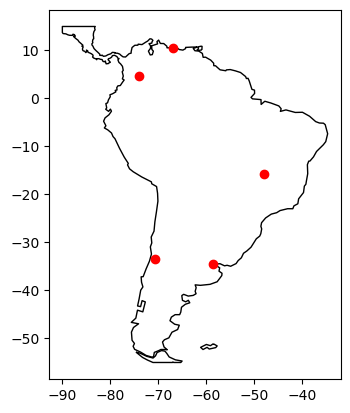

In [83]:
ax = world.clip([-90, -55, -25, 15]).plot(color="white", edgecolor="black")

gdf.plot(ax=ax, color="red")

plt.show()